In [1]:
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

from solardatatools import DataHandler
import pandas as pd

# for CVXPY implementation
from solardatatools.signal_decompositions import tl1_l1d1_l2d2p365 as cvx_sd
from solardatatools.signal_decompositions_l2norm import tl1_l1d1_l2d2p365 as cvx_sd_l2norm

# Import data from `tests/fixtures`

In [2]:
# Import data
fixtures_path = "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/"

data_file_path = Path(fixtures_path + "data_transforms/timeseries.csv") 
# PVDAQ, sysid=4, see dataio.py

df = pd.read_csv(data_file_path, index_col=0, parse_dates=True)
dh = DataHandler(df)

In [3]:
dh.run_pipeline(verbose=False)

/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

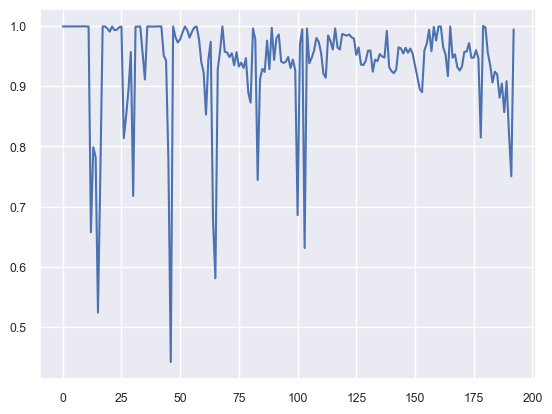

In [6]:
data_max = np.max(dh.filled_data_matrix)
system_capacity_signal = np.max(dh.filled_data_matrix, axis=0)/ data_max
plt.plot(system_capacity_signal);

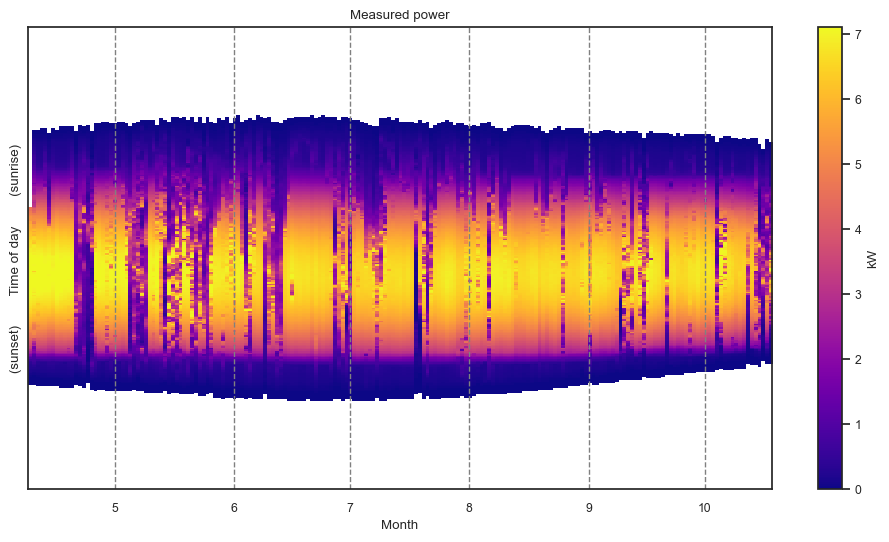

In [8]:
dh.plot_heatmap();

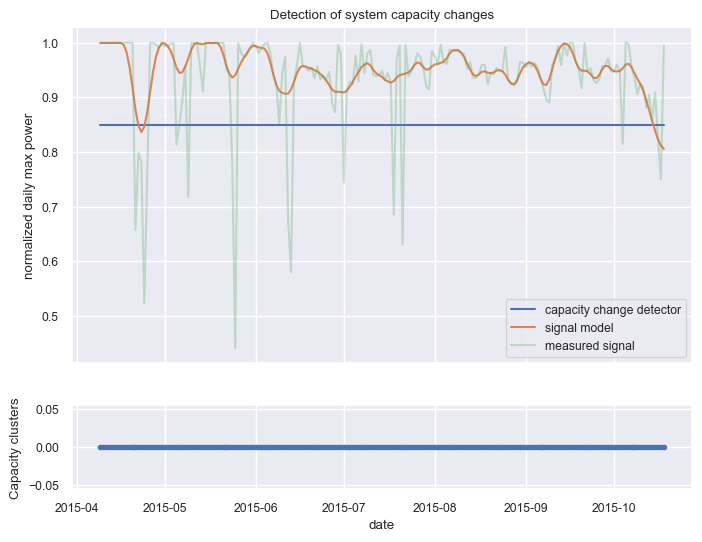

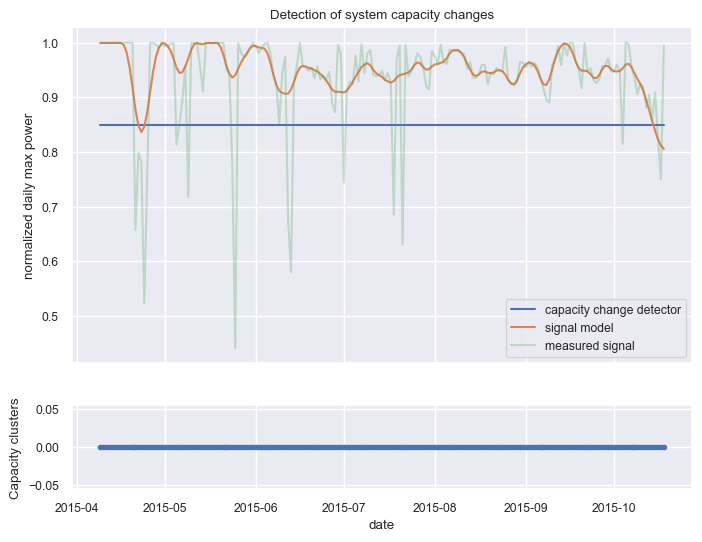

In [4]:
dh.capacity_clustering(plot=True, show_clusters=True)